# SAID 
### Back-end demo

## Load the constituent data
In the developed model, the constituent data is suspended-sediment concentration (SSC).
This cell loads SSC observations from a tab-delimited text file, drops the sample method code, and displays the Pandas DataFrame containing the SSC observations.

In [1]:
%matplotlib inline
import os

from linearmodel.datamanager import DataManager

data_directory = r'.\SpoonRiverAcoustics'

# load constituent data (SSC)
ssc_filename = r'spoonSSC.txt'
scc_file_path = os.path.join(data_directory, ssc_filename)
ssc_data = DataManager.read_tab_delimited_data(scc_file_path)

# drop the sample method code
ssc_data = ssc_data.drop_variables(['SampleMethod'])

# show constituent dataset
ssc_data.get_data()

,SSC
DateTime,
2013-02-07 13:00:00,299
2013-02-10 12:00:00,281
2013-02-13 10:30:00,756
2013-02-16 10:15:00,101
2013-02-19 12:00:00,85
2013-02-23 13:00:00,63
2013-02-27 13:00:00,49
2013-03-05 13:00:00,59
2013-03-08 16:00:00,50


## Load the surrogate data
The surrogate variable will ultimately be mean sediment corrected backscatter (MeanSCB). MeanSCB is calculated from raw acoustic backscatter data. The following cell loads the raw backscatter from two sets of Argonaut files and displays the raw data.

In [2]:
from acoustic import RawBackscatterData

# load Argonaut data
acoustic_filenames = ['SPOON001', 'SPOON002']
advm_data = RawBackscatterData.read_argonaut_data(data_directory, acoustic_filenames[0])
for index in range(1, len(acoustic_filenames)):
    tmp_advm_data = RawBackscatterData.read_argonaut_data(data_directory, acoustic_filenames[index])
    advm_data = advm_data.add_data(tmp_advm_data, keep_curr_obs=True)

# show the contents of the raw data
advm_data.get_data()

C:\Users\domanski\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,Cell05SNR1,Cell04Amp1,Cell03SNR1,Cell03SNR2,Cell07Amp2,Cell06SNR2,Cell08SNR2,Cell06Amp2,Cell09Amp2,Cell02SNR2,...,Cell09SNR1,Cell08Amp1,Cell07SNR2,Cell09SNR2,Vbeam,Cell02SNR1,Cell05SNR2,Cell10SNR2,Cell05Amp1,Cell03Amp1
2013-01-31 12:41:46,-0.4,27.0,-0.4,45.2,62.0,20.6,6.9,81.0,38.0,55.5,...,-0.4,27.0,12.5,2.2,1.699,-0.4,28.4,0.4,27.0,27.0
2013-01-31 12:56:46,-0.9,27.0,-0.9,45.2,62.0,20.2,6.5,80.0,39.0,55.9,...,-0.9,27.0,12.5,2.6,1.705,-0.9,28.4,0.4,27.0,27.0
2013-01-31 13:11:46,-0.4,27.0,-0.4,45.2,61.0,19.8,6.5,79.0,38.0,55.9,...,-0.4,27.0,12.0,2.2,1.709,-0.4,28.0,0.4,27.0,27.0
2013-01-31 13:26:46,-0.4,27.0,-0.4,45.2,62.0,19.8,6.5,79.0,38.0,55.9,...,-0.4,27.0,12.5,2.2,1.716,-0.4,28.0,0.0,27.0,27.0
2013-01-31 13:41:46,-0.4,27.0,-0.4,46.0,63.0,20.6,6.5,80.0,38.0,56.3,...,-0.4,27.0,13.3,2.6,1.721,-0.4,28.8,0.4,27.0,27.0
2013-01-31 13:56:46,-0.4,27.0,-0.4,45.6,62.0,19.4,6.5,78.0,37.0,56.3,...,-0.4,27.0,12.5,1.7,1.731,-0.4,28.4,0.0,27.0,27.0
2013-01-31 14:11:46,-0.4,27.0,-0.4,46.0,60.0,19.8,6.0,78.0,37.0,56.3,...,-0.4,27.0,12.0,2.2,1.735,-0.4,28.8,0.4,27.0,27.0
2013-01-31 14:26:46,-0.4,27.0,-0.4,45.6,59.0,19.8,6.0,78.0,37.0,56.8,...,-0.4,27.0,11.6,2.2,1.741,-0.4,28.4,0.4,27.0,27.0
2013-01-31 14:41:46,-0.4,27.0,-0.4,46.4,61.0,19.8,6.9,78.0,37.0,56.8,...,-0.4,27.0,12.5,2.2,1.746,-0.4,28.0,0.4,27.0,27.0
2013-01-31 14:56:46,-0.4,27.0,-0.4,46.9,62.0,19.8,6.5,79.0,38.0,56.3,...,-0.4,27.0,12.5,2.2,1.756,-0.4,28.8,0.0,27.0,27.0


## View the ADVM configuration parameters
In addition to backscatter data, the RawBackscatterData.read_argonaut_data() method also loads configuration parameters from the Argonaut data set. The next cell shows the configuration parameters that have been loaded from the data set.

In [3]:
# show configuration parameters
configuration_parameters = advm_data.get_configuration_parameters()
configuration_parameters

{'Beam Orientation': 'Vertical', 'Blanking Distance': 1.0, 'Cell Size': 1.75, 'Frequency': 1500.0, 'Effective Transducer Diameter': 0.03, 'Number of Beams': 2, 'Slant Angle': 25.0, 'Number of Cells': 10}

## Initialize ADVM backscatter data processing parameters
In order to process the backscatter data, the processing class needs user defined processing parameters. The next cell creates and displays default processing parameters.

In [4]:
# create processing parameters and show default parameter values
from acoustic import ADVMProcParam
processing_parameters = ADVMProcParam(configuration_parameters['Number of Cells'])
processing_parameters

{'WCB Profile Adjustment': True, 'Backscatter Values': 'SNR', 'Minimum Vbeam': -inf, 'Beam': 1, 'Intensity Scale Factor': 0.43, 'Minimum Number of Cells': 2, 'Maximum Cell Mid-Point Distance': inf, 'Minimum Cell Mid-Point Distance': -inf, 'Near Field Correction': True}

## Create an instance of the backscatter processing class
The ADVMBackscatterDataProcessor class handles the processing of backscatter data for calculating the acoustic parameters MeanSCB and sediment attenuation coefficient (SAC). The following cell initializes a processor instance using the default processing parameters and displays the results.

In [5]:
# create processor and show results using default processing parameters
from acoustic import ADVMBackscatterDataProcessor
abs_processor = ADVMBackscatterDataProcessor(advm_data, processing_parameters)
abs_processor.get_acoustic_parameters().get_data()

,SAC,MeanSCB
2013-01-31 12:41:46,NaN,10.545952
2013-01-31 12:56:46,NaN,10.067695
2013-01-31 13:11:46,NaN,10.582986
2013-01-31 13:26:46,NaN,10.987365
2013-01-31 13:41:46,NaN,10.989557
2013-01-31 13:56:46,NaN,10.591750
2013-01-31 14:11:46,NaN,10.591750
2013-01-31 14:26:46,NaN,10.591750
2013-01-31 14:41:46,NaN,10.993944
2013-01-31 14:56:46,NaN,10.593944


## Create a rating model
In the next cell, a rating model is initialized with the following information.

* Constituent variable: SSC
* Surrogate varibale: MeanSCB
* Match method: Mean, centered around constituent observation time
* Mean time window width: 30 minutes

A scatter plot, a model fit line and confidence intervals, is also shown.

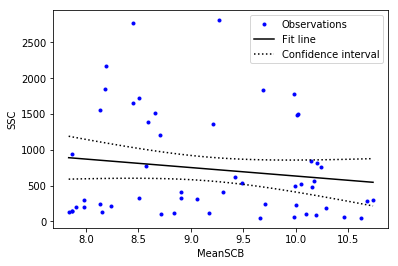

In [6]:
# create a surrogate model using SSC as the constituent and MeanSCB as the surrogate
from acoustic import BackscatterRatingModel
rating_model = BackscatterRatingModel(ssc_data, abs_processor, 
                                      constituent_variable='SSC', 
                                      surrogate_variables=['MeanSCB'], 
                                      match_method='mean', 
                                      match_time=30)
rating_model.plot()

## View backscatter profile plots

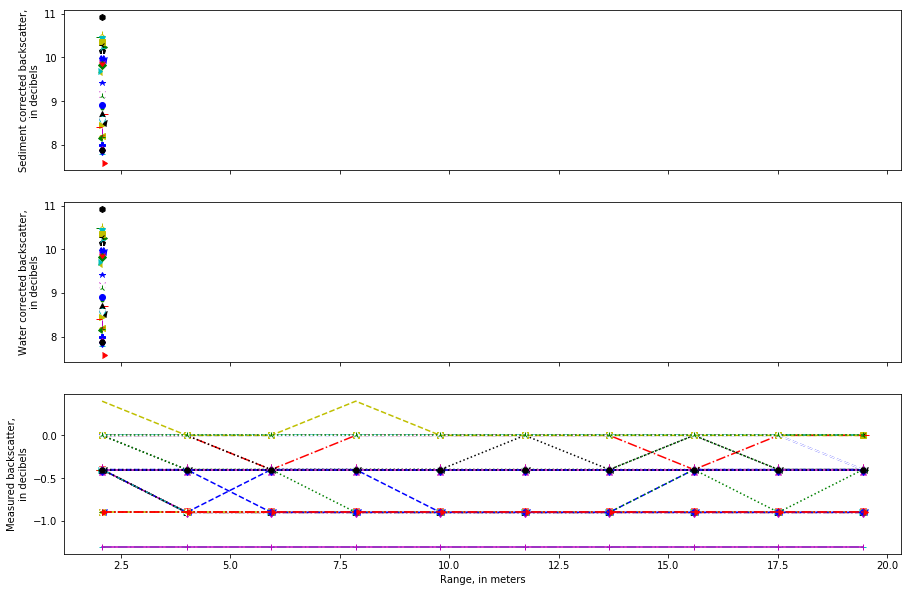

In [7]:
fig = rating_model.plot_backscatter_profiles()
fig.set_size_inches(15, 10)

## Change processing parameters
As shown, the default processing parameters do not produce satisfactory results. The created linear model is unsatisfactory, and the backscatter profiles indicate a problem with the data. 

The next cell changes the processing parameters, recalculates the acoustic parameters, and shows the recalculated values.

In [8]:
# adjust processing parameters and recalculate acoustic parameters
processing_parameters.update({'Backscatter Values': 'Amp',
                              'Beam': 2,
                              'WCB Profile Adjustment': True,
                              'Near Field Correction': True})
abs_processor.calculate_acoustic_parameters(processing_parameters)
abs_processor.get_acoustic_parameters().get_data()

,SAC,MeanSCB
2013-01-31 12:41:46,0.651559,96.940662
2013-01-31 12:56:46,0.650287,97.003201
2013-01-31 13:11:46,0.670455,97.132649
2013-01-31 13:26:46,0.633608,96.508493
2013-01-31 13:41:46,0.625126,96.752015
2013-01-31 13:56:46,0.684246,97.628471
2013-01-31 14:11:46,0.688223,97.506710
2013-01-31 14:26:46,0.720036,97.884057
2013-01-31 14:41:46,0.719506,98.191202
2013-01-31 14:56:46,0.647926,97.311457


## Recreate a rating model

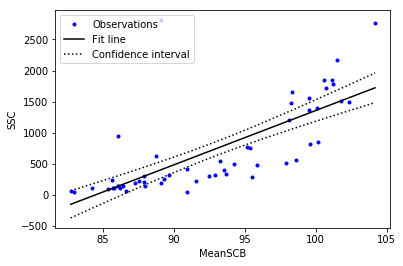

In [9]:
rating_model = BackscatterRatingModel(ssc_data, abs_processor, 
                                      constituent_variable='SSC', 
                                      surrogate_variables=['MeanSCB'], 
                                      match_method='mean', 
                                      match_time=30)
rating_model.plot()

## Transform the constituent variable
The plot above shows a non-linear trend. This can be corrected by log-transforming the constituent variable and bringing it in line with the physically-based and suggested form of the single-frequency sediment acoustic linear model, shown below.

$$\log_{10}{SSC}=\beta_{0}+\beta_{1}\overline{SCB}+\epsilon$$

The following cell transforms the constituent variable and shows the plot of the linear model.

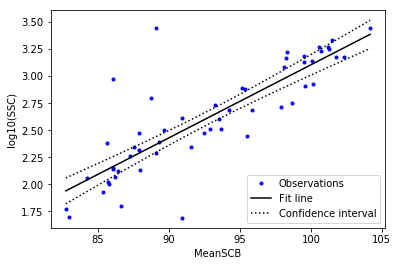

In [10]:
# log10 transform SSC
rating_model.set_constituent_transform('log10')
rating_model.plot()

## Remove outliers
The next cell removes observations that have been determined to be outliers and shows a scatter plot of the linear regression model.

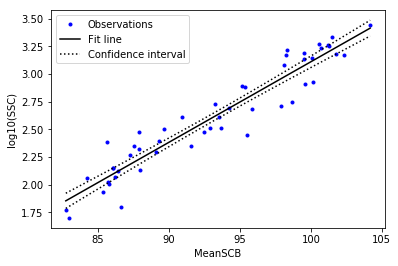

In [11]:
# remove outliers
model_index = rating_model.get_model_dataset().index
rating_model.exclude_observations(model_index[[6, 19, 37, 52]])
rating_model.plot()

## Plot backscatter profiles

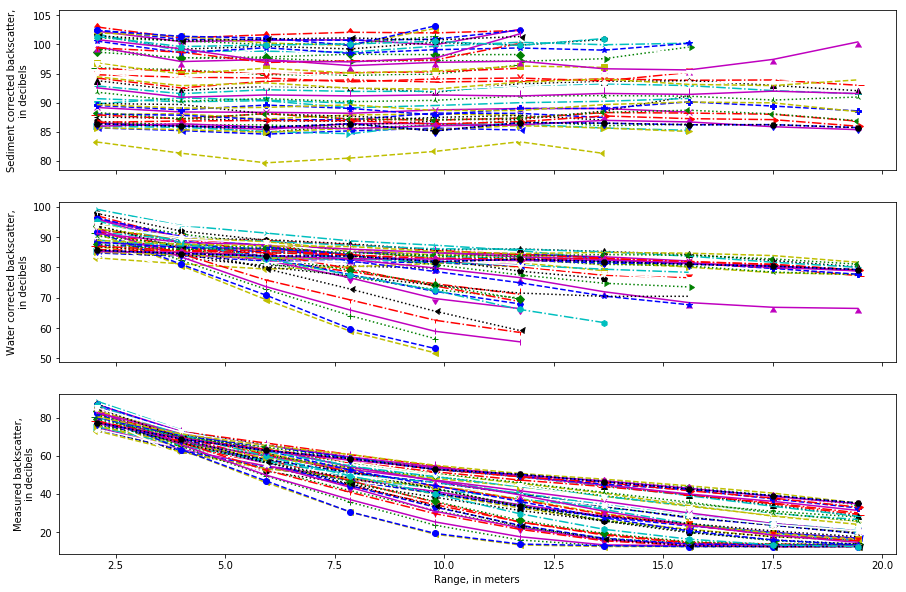

In [12]:
fig = rating_model.plot_backscatter_profiles()
fig.set_size_inches(15, 10)

## Show diagnostic plots
So far, the model is looking pretty good. The next cell creates a single figure with multiple sets of axes and plots some standard diagnostic plots to assess the quality of the regression. The Plots, from left to right and top to bottom are

* Model scatter plot (transformed constituent variable)
* Variable scatter plot (non-transformed constituent variable)
* Model predicted versus observed plot (transformed constituent variable)
* Variable predicted versus observed plot (non-transformed constituent variable)
* Residual versus fitted plot
* Residual probability plot
* Standardized serial correlation coefficient plot
* Residuals plotted against time

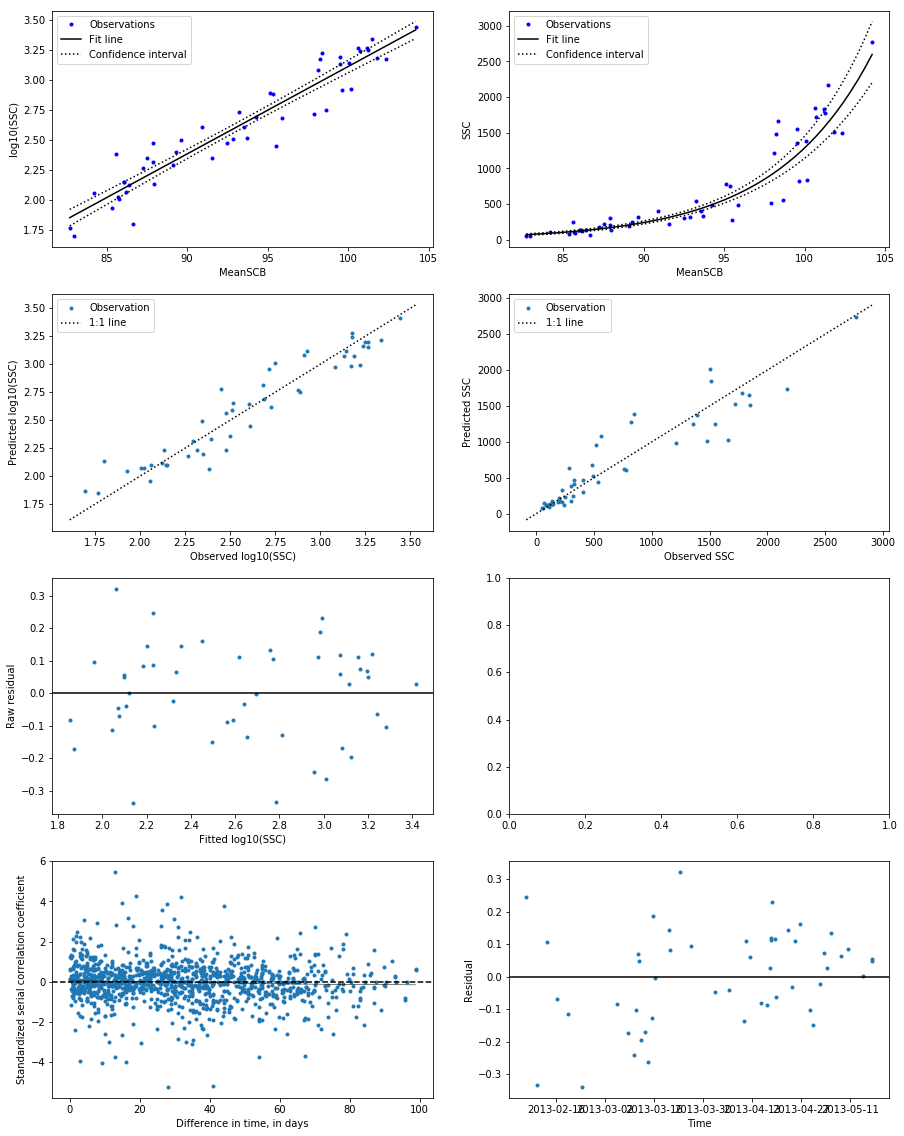

In [13]:
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
rating_model.plot(ax=ax1)
rating_model.plot('variable_scatter', ax=ax2)
rating_model.plot('model_pred_vs_obs', ax=ax3)
rating_model.plot('pred_vs_obs', ax=ax4)
rating_model.plot('resid_vs_fitted', ax=ax5)
rating_model.plot('resid_probability', ax=ax6)
rating_model.plot('serial_correlation', ax=ax7)
rating_model.plot('resid_vs_time', ax=ax8)
fig.set_size_inches(15, 20)

## Show a quantile plot
The next cell shows a quantile plot of the surrogate observations from the entire time series that was loaded with model observation quantiles indicated.

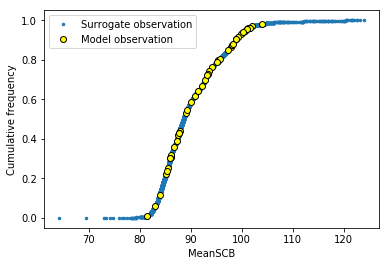

In [14]:
rating_model.plot('quantile')

## Generate model archive report
In the next cell, a report containing standard ordinary least square regression statistics is generated and displayed. The report itself can be saved to a CSV file.

In [15]:
rating_model.get_model_report()

<class 'statsmodels.iolib.summary.Summary'>
"""
======================================
       Linear regression model:       
--------------------------------------
log10(SSC) = -4.1622 + 0.072727MeanSCB
==========================================================================
                 coef    std err          t      P>|t|  [90.0% Conf. Int.]
--------------------------------------------------------------------------
Intercept     -4.1622      0.314    -13.263   1.14e-17    -4.689    -3.636
MeanSCB        0.0727      0.003     21.638   2.10e-26     0.067     0.078
                                                OLSRegression Results                                                
=====================================================================================================================
Number of observations                                         50   R-squared                                 0.90701
Error degrees of freedom                                       48   Adjusted R-squared                        0.90508
Root mean squared error                                   0.14739   F-statistic vs. constant model             468.21
Residual PPCC                                             0.99079   p-value                                2.0955e-26
Non-parametric smearing bias correction factor             1.0547   RMSE(%)                                    34.939
Linear correlation coefficient                            0.95237                                                    
===============================================
             High leverage:               0.12 
Extreme outlier (Standardized residual):   3   
       High influence (Cook's D)         2.1923
        High influence (DFFITS)           0.4  


          Variance-covariance matrix         
=============================================
              Intercept          MeanSCB     
---------------------------------------------
Intercept  0.0984844906236  -0.00105243792563
MeanSCB   -0.00105243792563 1.12965376715e-05
===========================================
Response variable summary                  
-------------------------------------------
                           SSC   log10(SSC)
         Minimum            50     1.699   
       1st Quartile        184     2.2648  
          Median           367     2.5622  
           Mean           700.04   2.6134  
       3rd Quartile        1360    3.1335  
         Maximum           2770    3.4425  
====================================
Explanatory variable summary        
------------------------------------
                             MeanSCB
          Minimum             82.716
        1st Quartile          87.242
           Median             93.402
            Mean              93.165
        3rd Quartile          99.496
          Maximum             104.18
===================================
         Data file location        
-----------------------------------
 .\SpoonRiverAcoustics\spoonSSC.txt
.\SpoonRiverAcoustics\SPOON002(Arg)
.\SpoonRiverAcoustics\SPOON001(Arg)
=============================================================================================================================================================================================================================================================================
      DateTime      SSC       MeanSCB       Obs. number     log10(SSC)     Missing Excluded Fitted log10(SSC)       Raw Residual        Estimated SSC    Normal quantile of residual Standardized Residual       Leverage          Cook's Distance             DFFITS        
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
2013-02-07 13:00:00 299  87.90092835278858       1      2.4756711883244296  False   False   2.2305879999945066  0.245083188

## Show a predicted time series
The cell below shows a time series of the predicted constituent using the loaded surrogate time series. The location of included model observations and excluded model observations is indicated. Missing observations would also be indicated if the model data set contained them. Also plotted is the 90% prediction interval.

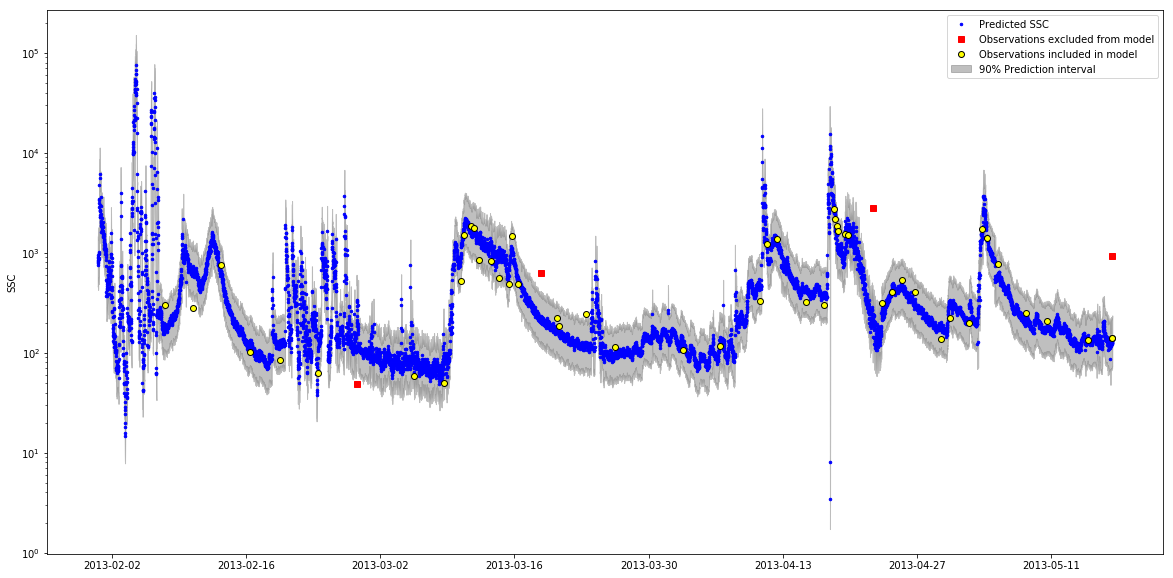

In [16]:
fig = plt.figure()
fig.set_size_inches(20, 10)
ax = fig.add_subplot(111)
rating_model.plot('time series', ax)